Cc1cc(CC([NH3+])C(=O)[O-])ccc1O


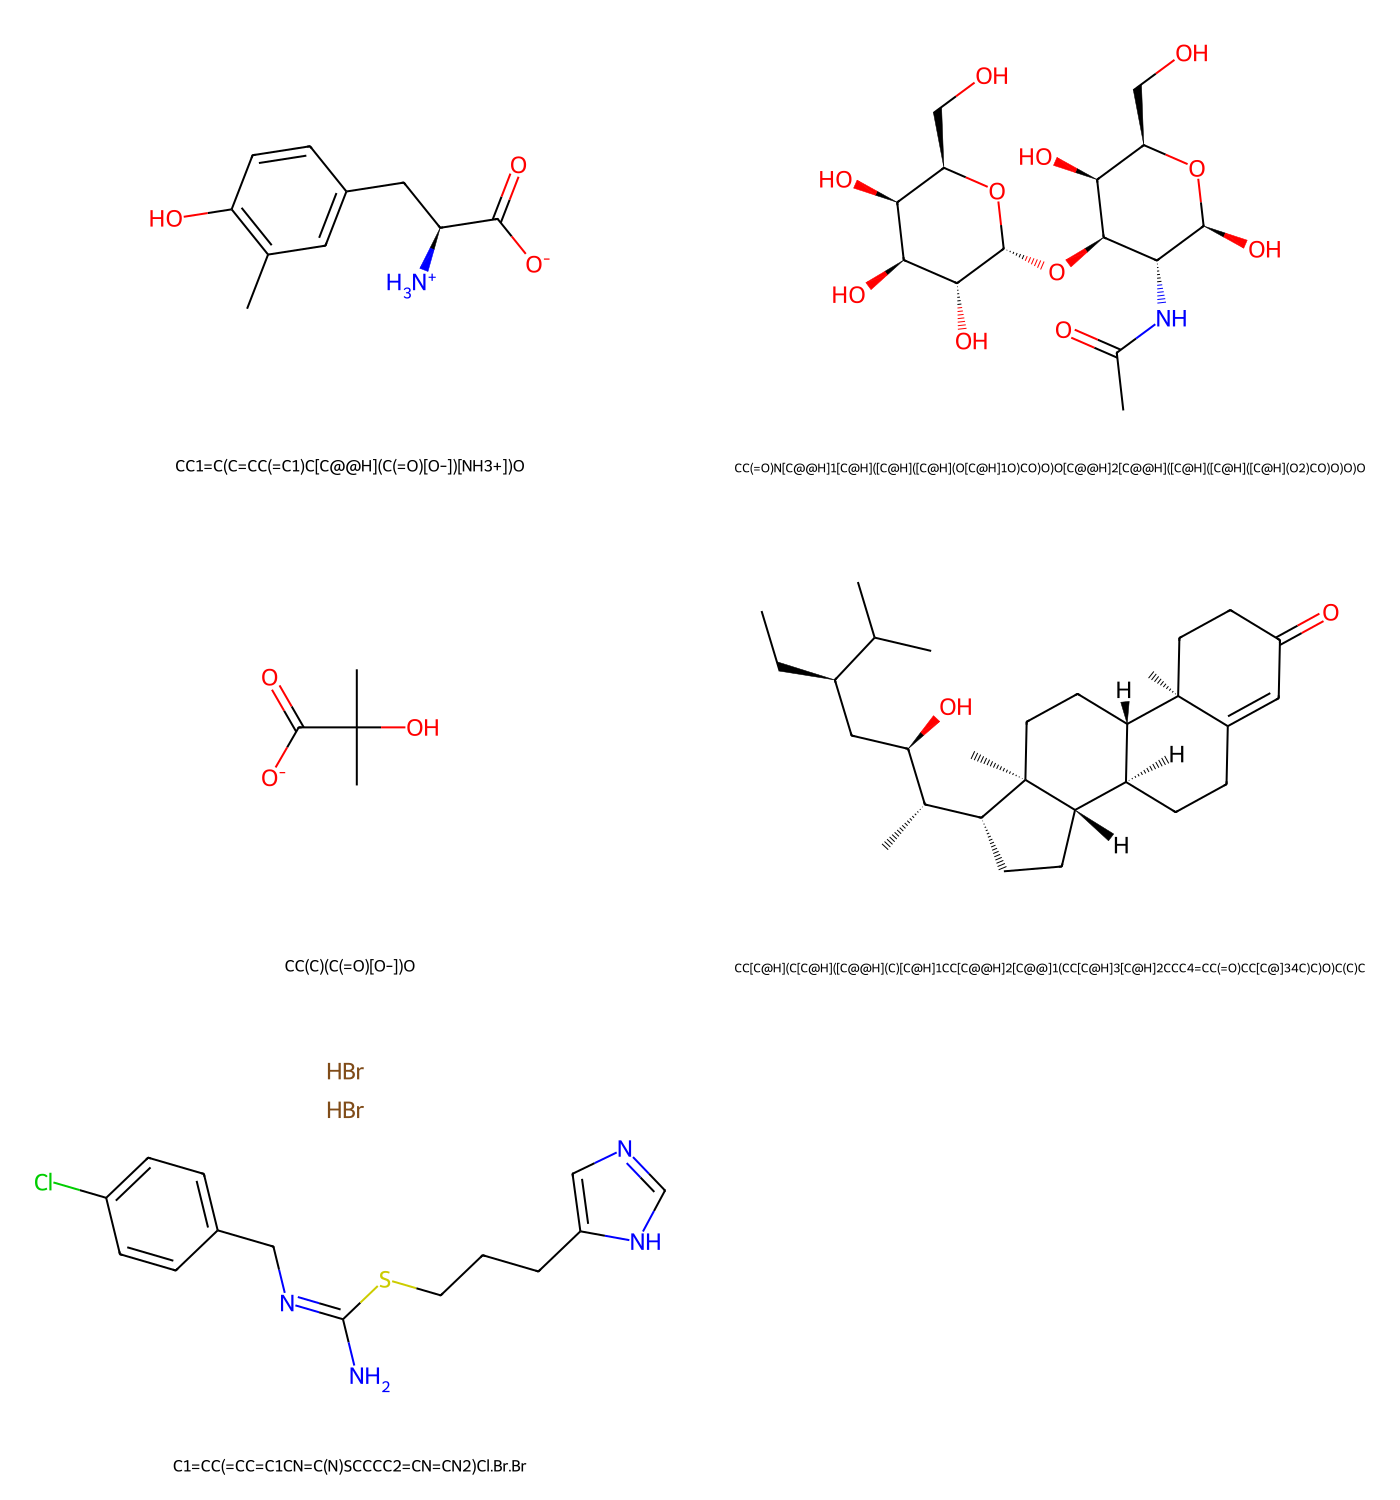

In [5]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, MACCSkeys
import matplotlib as mpl
import numpy as np

smis = ["CC1=C(C=CC(=C1)C[C@@H](C(=O)[O-])[NH3+])O",
"CC(=O)N[C@@H]1[C@H]([C@H]([C@H](O[C@H]1O)CO)O)O[C@@H]2[C@@H]([C@H]([C@H]([C@H](O2)CO)O)O)O",
"CC(C)(C(=O)[O-])O",
"CC[C@H](C[C@H]([C@@H](C)[C@H]1CC[C@@H]2[C@@]1(CC[C@H]3[C@H]2CCC4=CC(=O)CC[C@]34C)C)O)C(C)C",
#"CCCCCCCC/C=C\\CCCCCCCC(=O)OC[C@H](COP(=O)([O-])OC[C@H](CO)O)OC(=O)CCCCCCC/C=C\\CCCCCCCC",
"C1=CC(=CC=C1CN=C(N)SCCCC2=CN=CN2)Cl.Br.Br"]

mols = [Chem.MolFromSmiles(smi) for smi in smis]
#print(DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(mols[1], 2), AllChem.GetMorganFingerprint(mols[3], 2)))

print(Chem.MolToSmiles(mols[0], isomericSmiles=False))
img = Draw.MolsToGridImage(mols, legends=smis, molsPerRow=2, subImgSize=(700, 500))
display(img)

In [3]:
from nltk.translate.bleu_score import corpus_bleu
from transformers import BertTokenizerFast
import json

def apply_filter(seq):
    seq = list(filter(('[PAD]').__ne__, seq))
    seq = list(filter(('[CLS]').__ne__, seq))
    seq = list(filter(('[SEP]').__ne__, seq))
    return seq

data1 = open("../assets/molcap/biot5-captions.txt", "r").readlines()
data2 = open("/mnt/luoyz_dair/code_reference/MolCA/all_checkpoints/chebi_evaluation/lightning_logs/version_4/predictions.txt", "r").readlines()
data3 = open("../assets/molcap/mvmol-captions.txt", "r").readlines()
tokenizer = BertTokenizerFast.from_pretrained("../ckpts/text_ckpts/scibert_scivocab_uncased")
for i in range(1, len(data1)):
    pred1 = tokenizer.tokenize(data1[i].strip().split("\t")[-1], truncation=True, max_length=512, padding='max_length')
    pred1 = apply_filter(pred1)

    cur2 = json.loads(data2[i - 1])
    pred2 = tokenizer.tokenize(cur2["prediction"].strip(), truncation=True, max_length=512, padding='max_length')
    pred2 = apply_filter(pred2)

    pred3 = tokenizer.tokenize(data3[i].strip().split("\t")[-1], truncation=True, max_length=512, padding='max_length')
    pred3 = apply_filter(pred3)

    gt = tokenizer.tokenize(data1[i].strip().split("\t")[1], truncation=True, max_length=512, padding='max_length')
    gt = [apply_filter(gt)]

    bleu1 = corpus_bleu([gt], [pred1], weights=(0.25, 0.25, 0.25, 0.25))
    bleu2 = corpus_bleu([gt], [pred2], weights=(0.25, 0.25, 0.25, 0.25))
    bleu3 = corpus_bleu([gt], [pred3], weights=(0.25, 0.25, 0.25, 0.25))
    if bleu3 - bleu1 > 0.1 and bleu3 - bleu2 > 0.1:
        print(i, bleu1, bleu2, bleu3, "\n", "\n".join(data1[i].split("\t")), cur2["prediction"], "\n", data3[i].split("\t")[-1])

/mnt/luoyz_dair/anaconda3/envs/biomedgpt/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


75 0.445912029556302 0.3443161726270154 0.5715219575979859 
 CSCC(=O)O
The molecule is a sulfur-containing carboxylic consisting of thioglycolic acid carrying an S-methyl substituent. It has a role as a xenobiotic metabolite. It is a sulfur-containing carboxylic acid, a monocarboxylic acid and a methyl sulfide. It derives from a thioglycolic acid. It is a conjugate acid of a (methylthio)acetate.
The molecule is a sulfur-containing carboxylic acid that is acetic acid in which one of the methyl hydrogens has been replaced by a methylsulfanyl group. It is a sulfur-containing carboxylic acid and a thioacetate ester. It derives from an acetic acid. It is a conjugate acid of a (methylthio)acetate.
 The molecule is a monocarboxylic acid that is (R)-thioglycolic acid substituted by a carboxy group at C-1. It derives from a (R)-thioglycolic acid. It is a conjugate acid of a (1R)-1-carboxylatoethylthioglycolate(1-). 
 The molecule is a sulfur-containing carboxylic acid that is acetic acid in whi